In [1]:
from ep_predictor.predictor_backend import preprocessing, ep_prediction

In [2]:
#Constant Setup
pctg=99
cutout_size=33

#EFM9: binary_threshold=0.04, object_size=3, hole_size=30, m_thresh=0.30
#EFM8: binary_threshold=0.41, object_size=3, hole_size=30, m_thresh=0.778
#EFM7: binary_threshold=0.095, object_size=4, hole_size=15, m_thresh=0.44
#EFVM: binary_threshold=0.05, object_size=2, hole_size=2, m_thresh=0.785

name='efm8'
curves_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\lifts'
topography_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\FlattenTopo_.txt'
ref_file=rf"c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Map_Ep.txt"
binary_threshold=0.067
object_size=3
hole_size=30
m_ep_thresh=0.3

c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:315: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  th=float(mask_ep.quantile(m_ep_thresh))
100%|██████████| 50176/50176 [00:08<00:00, 6126.25it/s]


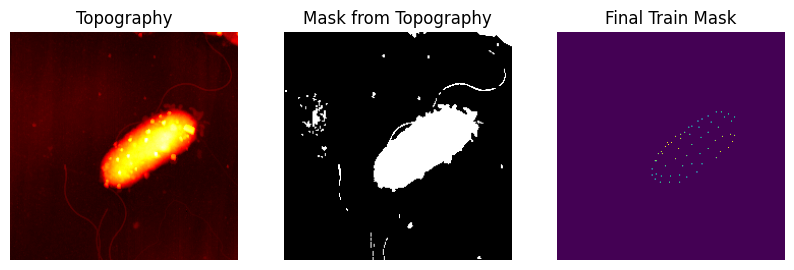

In [3]:
preproc = preprocessing(topography_file, curves_file, ref_file, cutout_size)
preproc.get_mask(binary_threshold, object_size, hole_size, m_ep_thresh)

preproc.get_fc(see_data=0, use_lifts=1)



In [4]:
preproc.get_conv(direct_mask=1)

100%|██████████| 5675/5675 [00:57<00:00, 98.08it/s] 


In [5]:
preproc.get_tables(rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\tablas')
preproc.add_tables()

100%|██████████| 360/360 [00:00<00:00, 2001.13it/s]


In [6]:
ep_predict=ep_prediction(preproc,pctg)
ep_predict.train(verb=0)

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
<function structural_similarity at 0x000001E8F20F9F80>


c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:492: RuntimeWarning: divide by zero encountered in divide
  error_map_r=(abs(np.subtract(y_mat, full_img_cell))/y_mat)*100
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The error map presents 19 error values > 1 (31.67%)


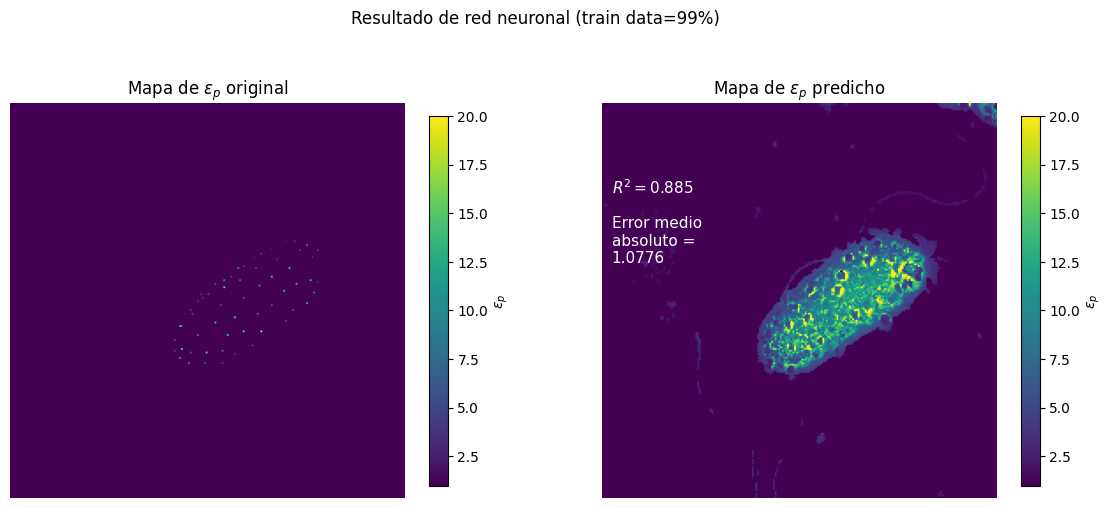

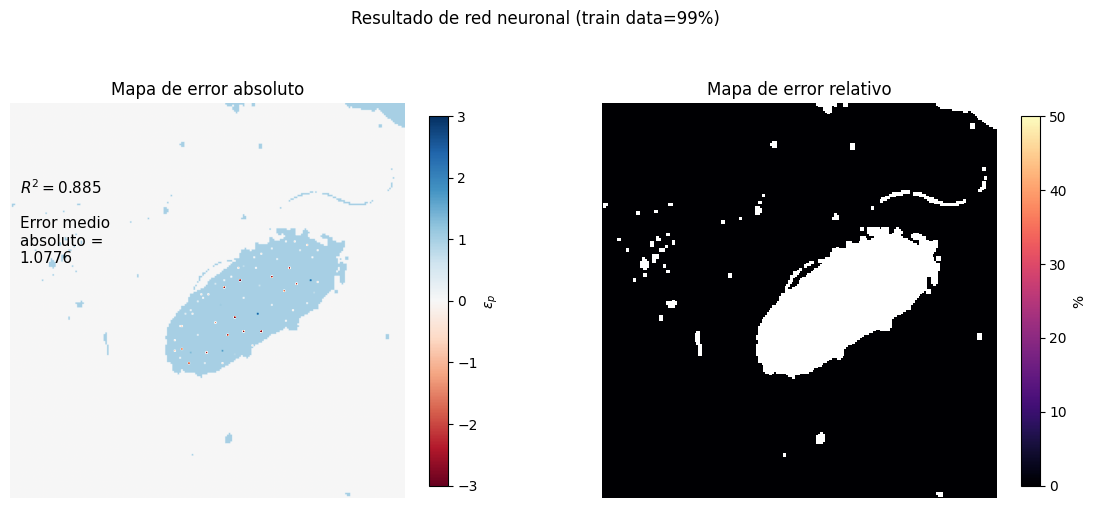

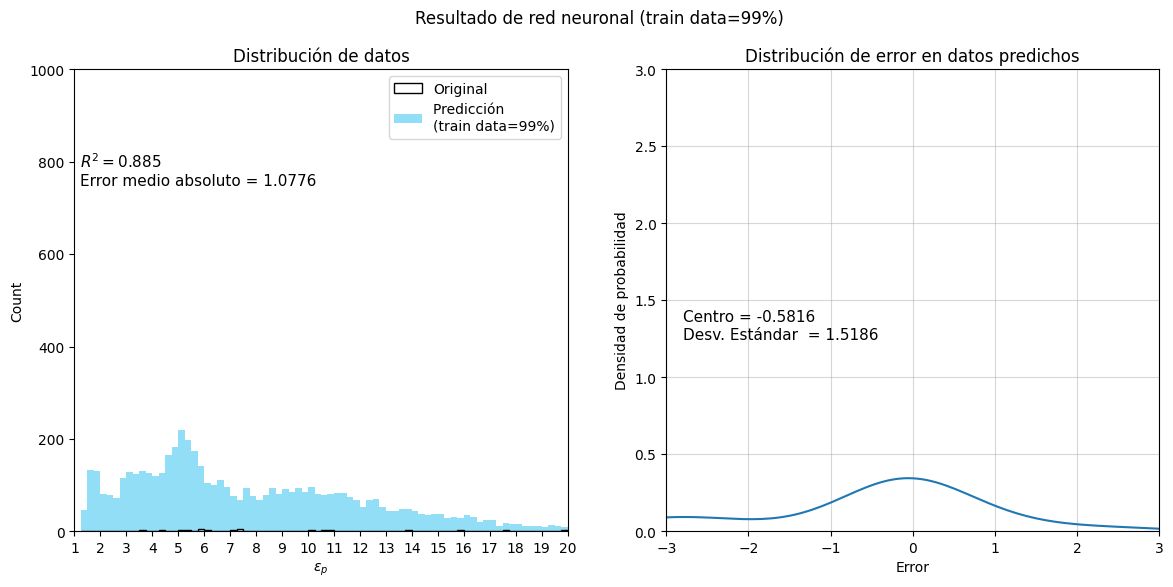

<Figure size 640x480 with 0 Axes>

In [7]:

ep_predict.predict(preproc.fc.x_masked_with_topo_norm,
              preproc.conv.x_cutouts_masked_from_topo)
ep_predict.reconstruct(add_train_data=0)
ep_predict.display_results(max_v=20)

In [12]:
nu_lifts=r'c:\Users\mcano\Code\non-python\hfrsdm\OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Out_Get_10_EpOnpx_2024-5-16-12-17\lifts'
nu_topo=r'c:\Users\mcano\Code\non-python\hfrsdm\OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Out_Get_10_EpOnpx_2024-5-16-12-17\FlattenTopo_.txt'
nu_ref=r'c:\Users\mcano\Code\non-python\hfrsdm\OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Out_Get_10_EpOnpx_2024-5-16-12-17\Map_Ep.txt'

c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:315: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  th=float(mask_ep.quantile(m_ep_thresh))
100%|██████████| 50176/50176 [00:08<00:00, 5843.85it/s]


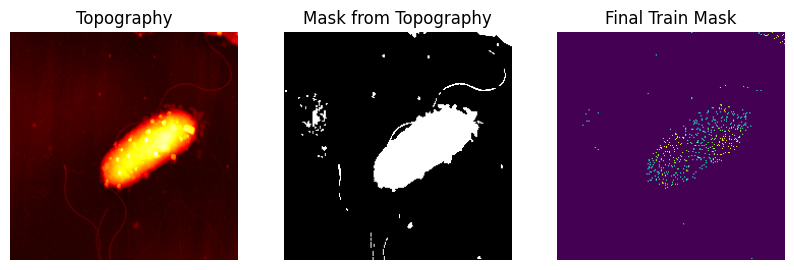

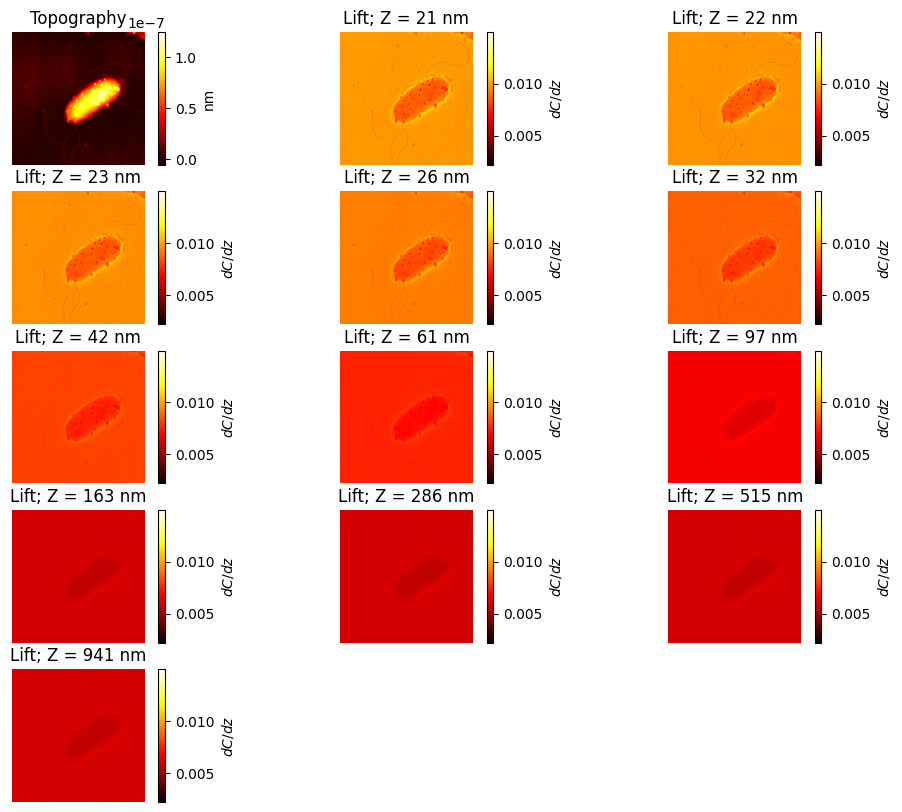

In [13]:
preproc = preprocessing(nu_topo, nu_lifts, nu_ref, cutout_size)
preproc.get_mask(binary_threshold, object_size, hole_size, m_ep_thresh)
preproc.get_fc(see_data=1, use_lifts=1)
